In [40]:
from sympy import *
from sympy.utilities.iterables import subsets
init_printing()
from IPython.display import *

In [41]:
s,t,x,u,v=symbols('s t x u v')
var('alpha')

In [42]:
def perm(A):
    if A.shape==(1,1):
        return A[0,0]
    else:
        n=A.shape[0]
        return sum([A[0,i]*perm(A.minorMatrix(0,i)) for i in range(n)])

In [43]:
def derange(n):
    if n==0:
        return 1
    else:
        return n*derange(n-1)+(-1)**n

In [44]:
for d in range(1,6):
    A=t*ones(d,d)+s*eye(d)    
    display(expand(simplify(perm(A))))

In [45]:
[perm(ones(d,d)-eye(d)) for d in range(1,9)]

In [46]:
y=[derange(i) for i in range(21)]
y

In [47]:
def arrange(n):
    if n==0:
        return 1
    else:
        return n*arrange(n-1)+1

In [48]:
[perm(ones(d,d)+eye(d)) for d in range(1,9)]

In [49]:
y=[arrange(i) for i in range(21)]
y

In [50]:
def h(a,b,s,t):
    return integrate(exp(-x)*(s+t*x)**a*(t*x)**b,(x,0,oo))

In [51]:
# This gives arrangements
[h(k,0,1,1) for k in range(21)]

In [52]:
# This give derangements
[h(k,0,-1,1) for k in range(21)]

In [53]:
k=2
Z=list(subsets(range(d),k))
Z

In [54]:
def zpow(E,k):
    d=E.shape[0]
    N=binomial(d,k)
    Z=list(subsets(range(d),k))
    return Matrix(N,N,lambda i,j: expand(perm(E.extract(Z[i],Z[j]))))

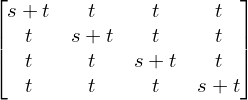

In [55]:
d=4
A=t*ones(d,d)+s*eye(d) 
A

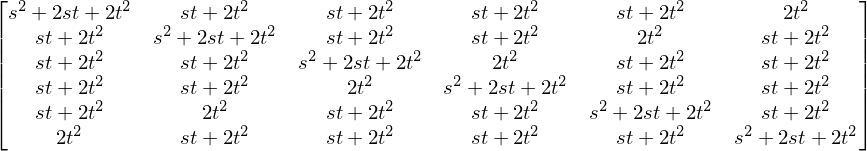

In [56]:
l=2
Al=zpow(A,l)
Al

In [57]:
n=A.shape[0]
display([h(l-i,i,s,t) for i in range(1+min(l,n-l))])
display([expand(simplify(s**alpha*t**(alpha+l-n)/factorial(n-l-alpha)*h(l-alpha,n-l-alpha,s,t))) for alpha in range(1+min(l,n-l))])
[binomial(n,alpha)-binomial(n,alpha-1) for alpha in range(1+min(l,n-l))]

In [58]:
Al.eigenvals()

$$\frac{s^\alpha t^{\alpha+l-n}}{(n-l-\alpha)!}\,h(l-\alpha,n-l-\alpha,s,t)$$